Por favor, sube el archivo Excel que contiene los datos de TB3M y TB6M.


Saving Tabla19.xlsx to Tabla19.xlsx


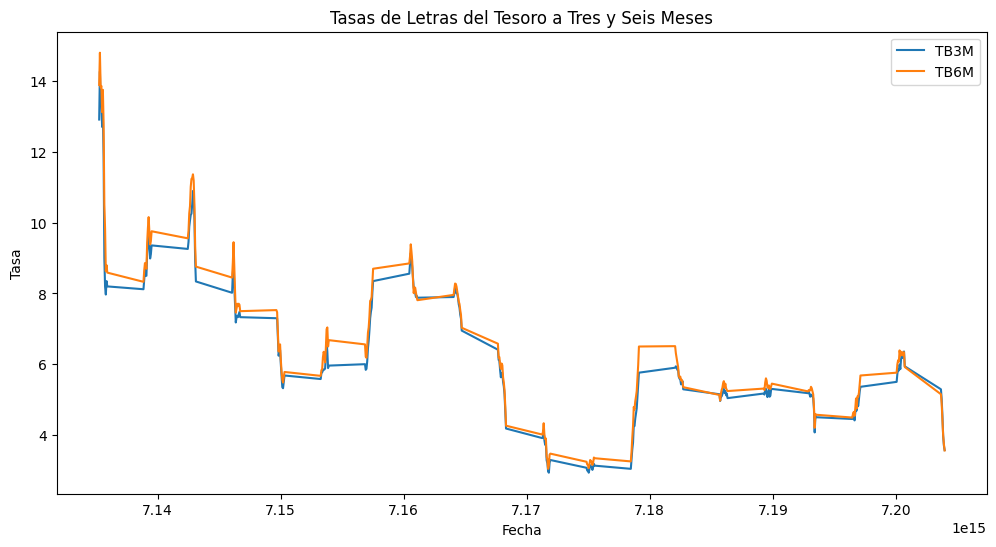


Pruebas de raíz unitaria para TB3M:
Prueba ADF:
Estadístico ADF: -1.5392, p-valor: 0.5140
Interpretación: No estacionario

Prueba KPSS:
Estadístico KPSS: 1.4540, p-valor: 0.0100
Interpretación: No estacionario

Pruebas de raíz unitaria para TB6M:
Prueba ADF:
Estadístico ADF: -3.7738, p-valor: 0.0032
Interpretación: Estacionario

Prueba KPSS:
Estadístico KPSS: 1.4961, p-valor: 0.0100
Interpretación: No estacionario

Prueba de Cointegración de Johansen:
Estadísticos de traza: [52.36462346 15.02232689]
Valores críticos (95%): [15.4943  3.8415]
Conclusión: Las series están cointegradas.

Interpretación Económica:
La cointegración entre TB3M y TB6M sugiere que hay una relación de equilibrio a largo plazo entre las dos tasas de letras del Tesoro.
Esto significa que si una tasa se desvía de la otra, eventualmente volverán a moverse juntas.

Análisis VAR en niveles:
Dado que las series están cointegradas, se puede realizar el análisis VAR en niveles.


<ipython-input-5-505b2bab0279>:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
<ipython-input-5-505b2bab0279>:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)


In [5]:
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Paso 1: Cargar los datos
def load_data():
    print("Por favor, sube el archivo Excel que contiene los datos de TB3M y TB6M.")
    upload = files.upload()
    filename = list(upload.keys())[0]
    try:
        xls = pd.ExcelFile(filename)
        if len(xls.sheet_names) == 0:
            raise ValueError("El archivo Excel no contiene hojas.")
        df = pd.read_excel(xls, sheet_name=0)  # Leer la primera hoja
    except ValueError as e:
        print(f"Error: {e}")
        return None
    except Exception as e:
        print(f"Error al leer el archivo: {e}")
        return None
    return df

# Paso 2: Verificar las columnas necesarias
def check_columns(df):
    required_columns = ['Date', 'TB3M', 'TB6M']
    for column in required_columns:
        if column not in df.columns:
            print(f"Error: La columna '{column}' no se encuentra en el DataFrame.")
            return False
    return True

# Paso 3: Graficar las series temporales
def plot_time_series(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['TB3M'], label='TB3M')
    plt.plot(df['Date'], df['TB6M'], label='TB6M')
    plt.title('Tasas de Letras del Tesoro a Tres y Seis Meses')
    plt.xlabel('Fecha')
    plt.ylabel('Tasa')
    plt.legend()
    plt.show()

# Paso 4: Pruebas de raíz unitaria
def unit_root_tests(series, name):
    print(f"\nPruebas de raíz unitaria para {name}:")
    adf_result = adfuller(series)
    print("Prueba ADF:")
    print(f'Estadístico ADF: {adf_result[0]:.4f}, p-valor: {adf_result[1]:.4f}')
    print("Interpretación:", "Estacionario" if adf_result[1] < 0.05 else "No estacionario")

    kpss_result = kpss(series)
    print("\nPrueba KPSS:")
    print(f'Estadístico KPSS: {kpss_result[0]:.4f}, p-valor: {kpss_result[1]:.4f}')
    print("Interpretación:", "No estacionario" if kpss_result[1] < 0.05 else "Estacionario")

# Paso 5: Prueba de cointegración
def cointegration_test(df):
    result = coint_johansen(df[['TB3M', 'TB6M']], det_order=0, k_ar_diff=1)
    print("\nPrueba de Cointegración de Johansen:")
    print(f'Estadísticos de traza: {result.lr1}')
    print(f'Valores críticos (95%): {result.cvt[:, 1]}')
    if result.lr1[0] > result.cvt[0, 1]:
        print("Conclusión: Las series están cointegradas.")
        return True
    else:
        print("Conclusión: Las series no están cointegradas.")
        return False

# Paso 6: Interpretación económica de la cointegración
def economic_interpretation_cointegration(is_cointegrated):
    if is_cointegrated:
        print("\nInterpretación Económica:")
        print("La cointegración entre TB3M y TB6M sugiere que hay una relación de equilibrio a largo plazo entre las dos tasas de letras del Tesoro.")
        print("Esto significa que si una tasa se desvía de la otra, eventualmente volverán a moverse juntas.")
    else:
        print("\nInterpretación Económica:")
        print("Si las series no están cointegradas, implica que no hay una relación de equilibrio a largo plazo entre las tasas de TB3M y TB6M.")
        print("Esto significa que las dos tasas pueden moverse independientemente una de la otra a largo plazo.")

# Paso 7: Análisis VAR
def var_analysis(df, is_cointegrated):
    if is_cointegrated:
        print("\nAnálisis VAR en niveles:")
        print("Dado que las series están cointegradas, se puede realizar el análisis VAR en niveles.")
    else:
        print("\nAnálisis VAR en primeras diferencias:")
        print("Dado que las series no están cointegradas, se recomienda realizar el análisis VAR en primeras diferencias para evitar resultados espurios.")

# Función principal
def main():
    # Cargar datos
    df = load_data()
    if df is None:
        return

    # Verificar columnas
    if not check_columns(df):
        return

    # Graficar series temporales
    plot_time_series(df)

    # Pruebas de raíz unitaria
    unit_root_tests(df['TB3M'], 'TB3M')
    unit_root_tests(df['TB6M'], 'TB6M')

    # Prueba de cointegración
    is_cointegrated = cointegration_test(df)

    # Interpretación económica
    economic_interpretation_cointegration(is_cointegrated)

    # Análisis VAR
    var_analysis(df, is_cointegrated)

# Ejecutar la función principal
if __name__ == "__main__":
    main()